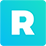

# **MISSING DATA**


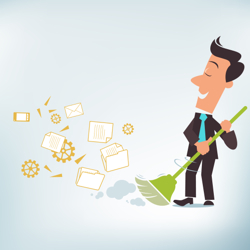

# A. Import libraries


In [3]:
import numpy as np
import pandas as pd

print('numby', np.__version__)
print('pandas', pd.__version__)

numby 1.25.2
pandas 1.5.3


# B. falsy_values

What does "missing data" mean? What is a missing value? It depends on the origin of the data and the context it was generated. For example, for a survey, a `Salary` field with an empty value, or a number 0, or an invalid value (a string for example) can be considered "missing data". These concepts are related to the values that Python will consider "Falsy":

In [ ]:
falsy_values = (0, False, None, '', [], {})

# In python all the values above are considered "falsy"

In [5]:
# any(falsy_values)

## B1. np.nan

Numpy has a special "nullable" value for numbers which is `np.nan`. It's NaN: "Not a number"



In [6]:
np.nan

nan

The `np.nan` value is kind of a virus. Everything that it touches becomes np.nan:



In [7]:
3 + np.nan

nan

For a numeric array, the None value is replaced by `np.nan`:



In [9]:
a = np.array([1, 2, 3, np.nan, None, 4], dtype='float')
a

array([ 1.,  2.,  3., nan, nan,  4.])

As we said, `np.nan` is like a virus. If you have any `nan` value in an array and you try to perform an operation on it, you'll get unexpected results:



In [14]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

print(a.mean())
print(a.sum())

nan
nan


## B2. np.inf

In [15]:
np.inf

inf

In [17]:
# Which also behaves as a virus:

print(3 + np.inf)
print(np.inf / 3)

inf
inf


In [18]:
np.inf / np.inf

nan

In [20]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype = float)
b.sum()

nan

## B3. Checking for nan or inf

There are two functions: `np.isnan` and `np.isinf` that will perform the desired checks:

In [21]:
np.isnan(np.nan)

True

In [22]:
np.isinf(np.inf)

True

And the joint operation can be performed with `np.isfinite`

In [23]:
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

`np.isnan` and `np.isinf` also take arrays as inputs, and return boolean arrays as results:

In [25]:
np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False,  True, False, False])

In [26]:
np.isinf(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False, False,  True, False])

In [27]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([ True,  True,  True, False, False,  True])

# C. Filtering them out

Whenever you're trying to perform an operation with a `Numpy array` and you know there might be missing values, you'll need to filter them out before proceeding, to avoid nan propagation. We'll use a combination of the previous `np.isnan` + boolean arrays for this purpose:



In [31]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

print(a[~np.isnan(a)])
a[~np.isnan(a)].mean()

[1. 2. 3. 4.]


2.5

In [35]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

print(a[np.isfinite(a)])
print('mean =',a[np.isfinite(a)].mean())
print('sum =', a[np.isfinite(a)].sum())

[1. 2. 3. 4.]
mean = 2.5
sum = 10.0
